# Customer Segmentation 

This notebook uses a data set that has around 50000 values. Its a customer centric data set , which has the data of all the orders that have been placed through different vendors and markets, starting from the year 2011 till 2015. Based on the analysis, I have developed a customer segementation through the RFM (recency, frequency, and monetary) segmentation. Furthermore, I have used machine learning with the RFM segmentation to predict future customer's and their potential profitability and engagement. 

All the modules and packages that will be used in this notebook can be seen here. 

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
from IPython import display 
from sklearn.preprocessing import StandardScaler
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Data Wrangling

The data is loaded to understand what the data holds and how it can be prepared for analysis. 

In [2]:
data = pd.read_csv(r"C:\Users\ryanp\Desktop\Springboard\Springboard\global_superstore_2016.csv")
data.head()

Row ID                  Order ID  Order Date   Ship Date     Ship Mode  \
0   40098  CA-2014-AB10015140-41954  11/11/2014  11/13/2014   First Class   
1   26341    IN-2014-JR162107-41675    2/5/2014    2/7/2014  Second Class   
2   25330    IN-2014-CR127307-41929  10/17/2014  10/18/2014   First Class   
3   13524   ES-2014-KM1637548-41667   1/28/2014   1/30/2014   First Class   
4   47221   SG-2014-RH9495111-41948   11/5/2014   11/6/2014      Same Day   

    Customer ID     Customer Name      Segment  Postal Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

   ...   Product ID    Category Sub-Category  \
0  ...  TEC-PH-5816  Technology       Phones   
1  ...  FUR-CH-5379   Furniture       Chairs   
2  ...  TEC-PH-5356  Technology       Phones   
3  ...  TEC-PH-5267  Technology       Phones   
4  ...  TEC-CO-6011  Technology      Copiers   

                                Product Name    Sales Quantity Discount  \
0                           Samsung Convoy 3   221.98        2      0.0   
1  Novimex Executive Leather Armchair, Black  3709.40        9      0.1   
2          Nokia Smart Phone, with Caller ID  5175.17        9      0.1   
3             Motorola Smart Phone, Cordless  2892.51        5      0.1   
4             Sharp Wireless Fax, High-Speed  2832.96        8      0.0   

   Profit  Shipping Cost  Order Priority  
0   62.15          40.77            High  
1 -288.77         923.63        Critical  
2  919.97         915.49          Medium  
3  -96.54         910.16          Medium  
4  311.52         903.04        Critical  

[5 rows x 24 columns]

In [3]:
data.shape

(51290, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [5]:
data['Sales'] = data['Sales'].astype(float)
data['Quantity'] = data['Quantity'].astype(int)
data['Profit'] = data['Profit'].astype(float)
data['Shipping Cost'] = data['Shipping Cost'].astype(float)

The data shows that some of the numerical values are held as strings, specifically the Sales, Quantity, Profit, and Shipping Cost are strings. These numerical values are converted to floats or integers. 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [7]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing.sort_values(by='count')

count         %
Row ID              0   0.00000
Profit              0   0.00000
Discount            0   0.00000
Quantity            0   0.00000
Sales               0   0.00000
Product Name        0   0.00000
Sub-Category        0   0.00000
Category            0   0.00000
Product ID          0   0.00000
Market              0   0.00000
Region              0   0.00000
Country             0   0.00000
State               0   0.00000
City                0   0.00000
Segment             0   0.00000
Customer Name       0   0.00000
Customer ID         0   0.00000
Ship Mode           0   0.00000
Ship Date           0   0.00000
Order Date          0   0.00000
Order ID            0   0.00000
Shipping Cost       0   0.00000
Order Priority      0   0.00000
Postal Code     41296  80.51472

The Postal Code is the only column with missing values and 80.5% of the data is missing. This column will be removed given the high percentage of missing data as well as the data can be analysed without this colunmn. 

In [8]:
data = data.drop(['Postal Code', 'Discount'], axis=1)
data.head(1)

Row ID                  Order ID  Order Date   Ship Date    Ship Mode  \
0   40098  CA-2014-AB10015140-41954  11/11/2014  11/13/2014  First Class   

    Customer ID  Customer Name   Segment           City     State  ... Market  \
0  AB-100151402  Aaron Bergman  Consumer  Oklahoma City  Oklahoma  ...   USCA   

    Product ID    Category Sub-Category      Product Name   Sales Quantity  \
0  TEC-PH-5816  Technology       Phones  Samsung Convoy 3  221.98        2   

   Profit  Shipping Cost  Order Priority  
0   62.15          40.77            High  

[1 rows x 22 columns]

In [9]:
data[data == 0].count()

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Profit            672
Shipping Cost       0
Order Priority      0
dtype: int64

There are 0 values in the profit column. There can be many reasons why the profit may be zero; however, for analysis purposes this does not give pertinent information for customer segmentation. Any profit that is 0 or below will be excluded. 

In [10]:
data = data[data['Profit'] > 0]
data.shape

(38078, 22)

In [11]:
data[data['Quantity'] <= 0].count()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Region            0
Market            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Date'].head(1)

0   2014-11-11
Name: Order Date, dtype: datetime64[ns]

In [14]:
data['Revenue'] = data["Quantity"] * data["Sales"]
data.head(1)

Row ID                  Order ID Order Date   Ship Date    Ship Mode  \
0   40098  CA-2014-AB10015140-41954 2014-11-11  11/13/2014  First Class   

    Customer ID  Customer Name   Segment           City     State  ...  \
0  AB-100151402  Aaron Bergman  Consumer  Oklahoma City  Oklahoma  ...   

    Product ID    Category Sub-Category      Product Name   Sales Quantity  \
0  TEC-PH-5816  Technology       Phones  Samsung Convoy 3  221.98        2   

  Profit  Shipping Cost  Order Priority  Revenue  
0  62.15          40.77            High   443.96  

[1 rows x 23 columns]

A revenue column was added to identify how much the customer spent in total for that specific order.

In [15]:
data.describe()

Row ID         Sales      Quantity        Profit  Shipping Cost  \
count  38078.000000  38078.000000  38078.000000  38078.000000   38078.000000   
mean   25656.919402    262.613073      3.493014     62.716175      28.182485   
std    14766.030122    507.909910      2.277996    157.836399      60.211312   
min        1.000000      0.990000      1.000000      0.040000       1.002000   
25%    12936.250000     34.117500      2.000000      6.550000       2.925000   
50%    25774.000000     92.700000      3.000000     18.560000       8.417000   
75%    38310.750000    264.930000      5.000000     56.295000      25.970000   
max    51290.000000  17499.950000     14.000000   8399.980000     933.570000   

             Revenue  
count   38078.000000  
mean     1284.848741  
std      3603.013949  
min         0.990000  
25%        76.560000  
50%       263.980000  
75%       973.342500  
max    128605.620000

The describe function was used to have a brief summary of the numerical values. 

# EDA

### Profit

**Note some graphs are images as they were obtained through Tableau. It is not interactive as it should be on Tableau but it is still good visual representation of the data.**

In [16]:
display.Image(r"C:\Users\ryanp\Desktop\Springboard\Springboard\Quarterly_Profits.png")

Overall, the business has been increasing in profits during 2012-2015. There is an identifiabe pattern with highest profit during Q4 and dropping with the upcoming Q1. This can be related to the holiday season with an increase in spending by customers. 

### Location

In [17]:
display.Image(r"C:\Users\ryanp\Desktop\Springboard\Springboard\Map_with_orders.png")

In [18]:
data['Country'].nunique()

151

In [19]:
country_count = data['Country'].value_counts().sort_values(ascending=False).head(20)
fig = px.scatter(country_count, x=country_count.index, y=country_count.values, size=country_count.values, size_max=100)
fig.update_layout(
    yaxis_title="# of Orders per Country",
    xaxis_title="Country")
fig.show()

A large portion of orders came from the United States. 

In [20]:
state_count = data['State'].value_counts().sort_values(ascending=False).head(20)
fig = px.scatter(state_count, x=state_count.index, y=state_count.values, size=state_count.values, size_max=100)
fig.update_layout(
    yaxis_title="# of Orders per State",
    xaxis_title="State")
fig.show()

In [21]:
data['State'].nunique()

929

There are a large amount of orders placed from California. It can be seen that many states from the U.S. are among the top 20 orders. 

In [22]:
city_count = data['City'].value_counts().sort_values(ascending=False).head(20)
fig = px.scatter(city_count, x=city_count.index, y=city_count.values, size=city_count.values, size_max=100)
fig.update_layout(
    yaxis_title="# of Orders per City",
    xaxis_title="City")
fig.show()

In [23]:
data['City'].nunique()

3257

In [24]:
region_count = data['Region'].value_counts().sort_values(ascending=False).head(20)
fig = px.scatter(region_count, x=region_count.index, y=region_count.values, size=region_count.values, size_max=100)
fig.update_layout(
    yaxis_title="# of Orders",
    xaxis_title="Region")
fig.show()

In [25]:
data['Region'].nunique()

23

Although California as a state had the most orders. New York City had the most orders by city. 

### Customer

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

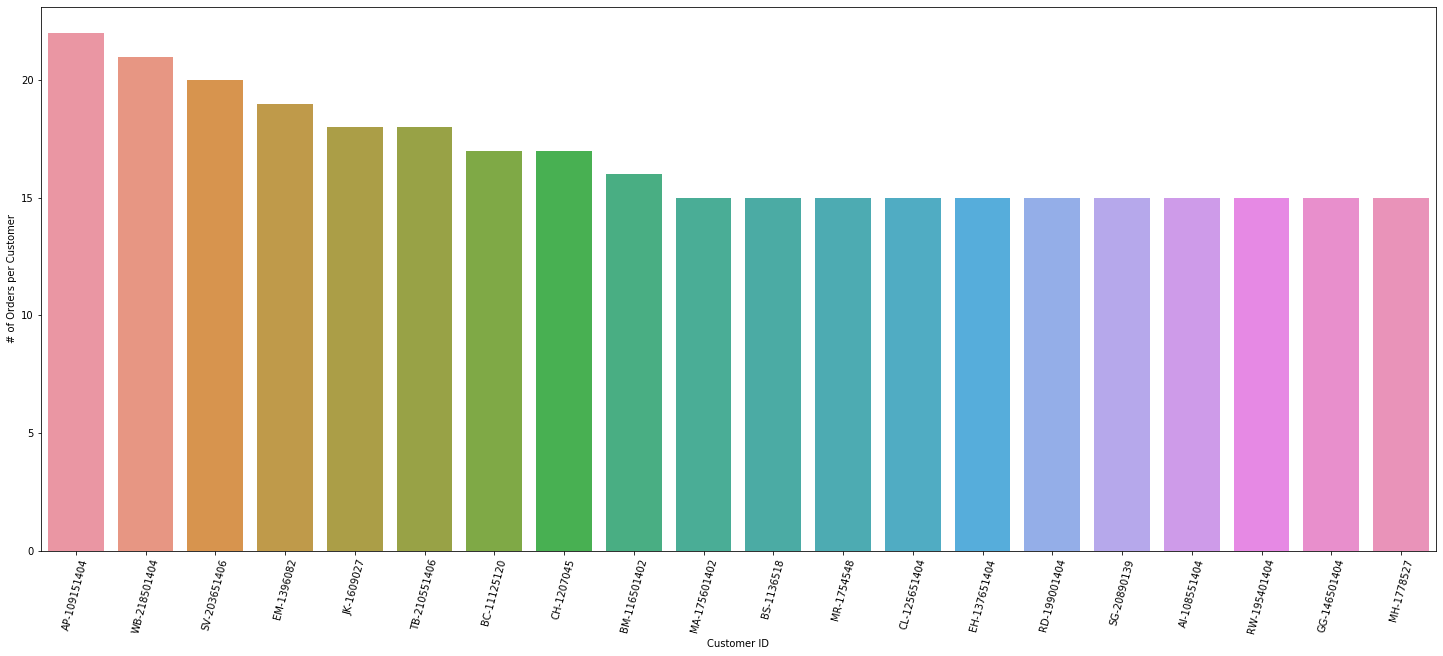

In [26]:
customer_count = data['Customer ID'].value_counts().head(20)
customer_count_ordered = customer_count.sort_values(ascending=True)
plt.figure(figsize=(25, 10))
sns.barplot(x=customer_count_ordered.index, y=customer_count_ordered.values, order=customer_count.index)
plt.ylabel('# of Orders per Customer')
plt.xlabel('Customer ID')
plt.xticks(rotation=75)

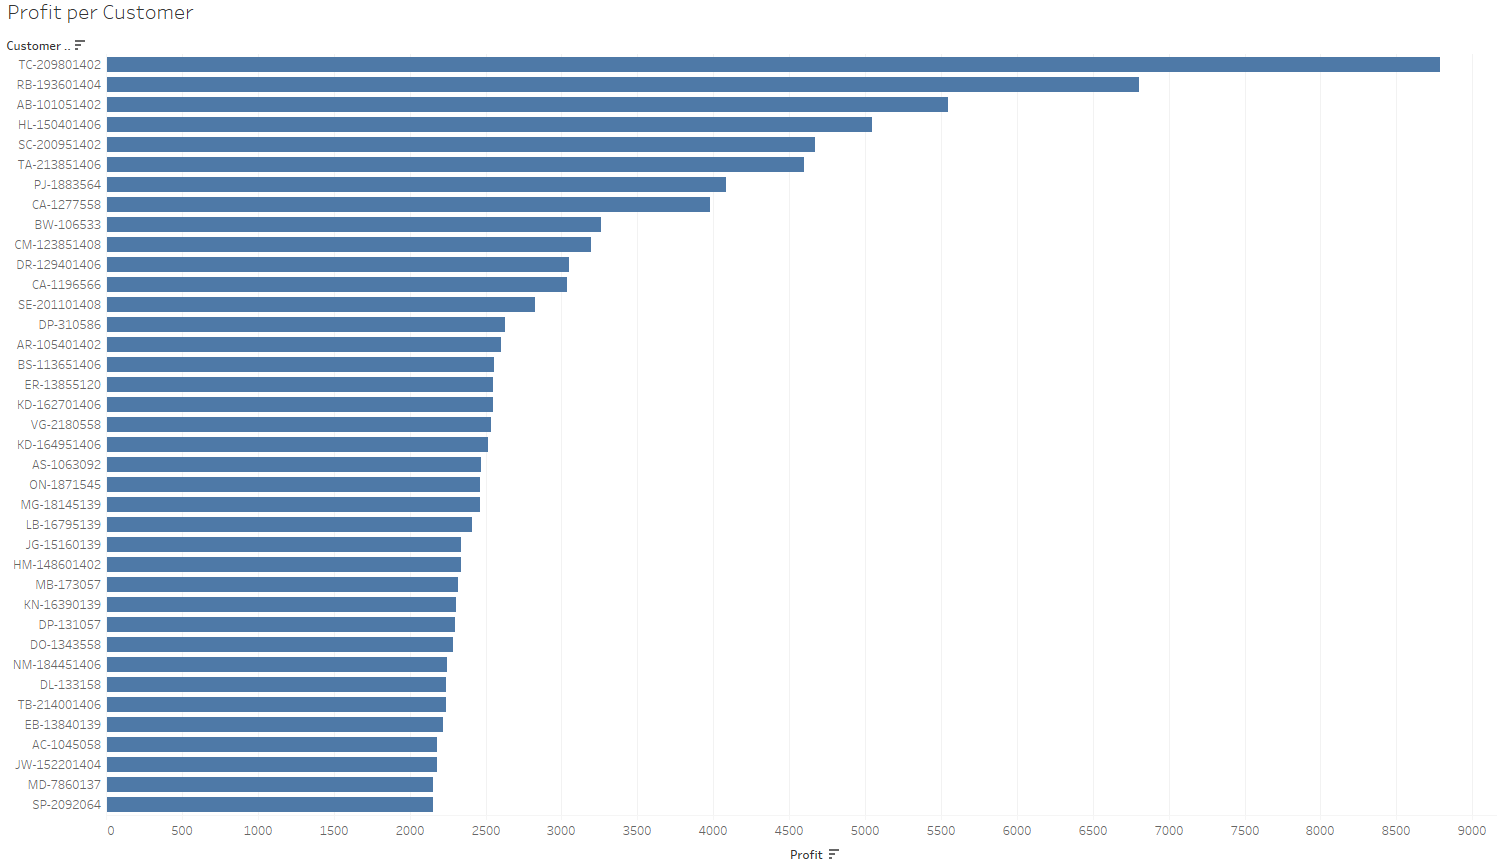

In [27]:
display.Image(r"C:\Users\ryanp\Desktop\Springboard\Springboard\Profit_per_Customers.png")

These graphs help us identify which customers had placed the most numbers of orders and provided the most profit. The highest profit by a customer was nearly $9,000 and the highest number of orders was nearly 25. 

### Product

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

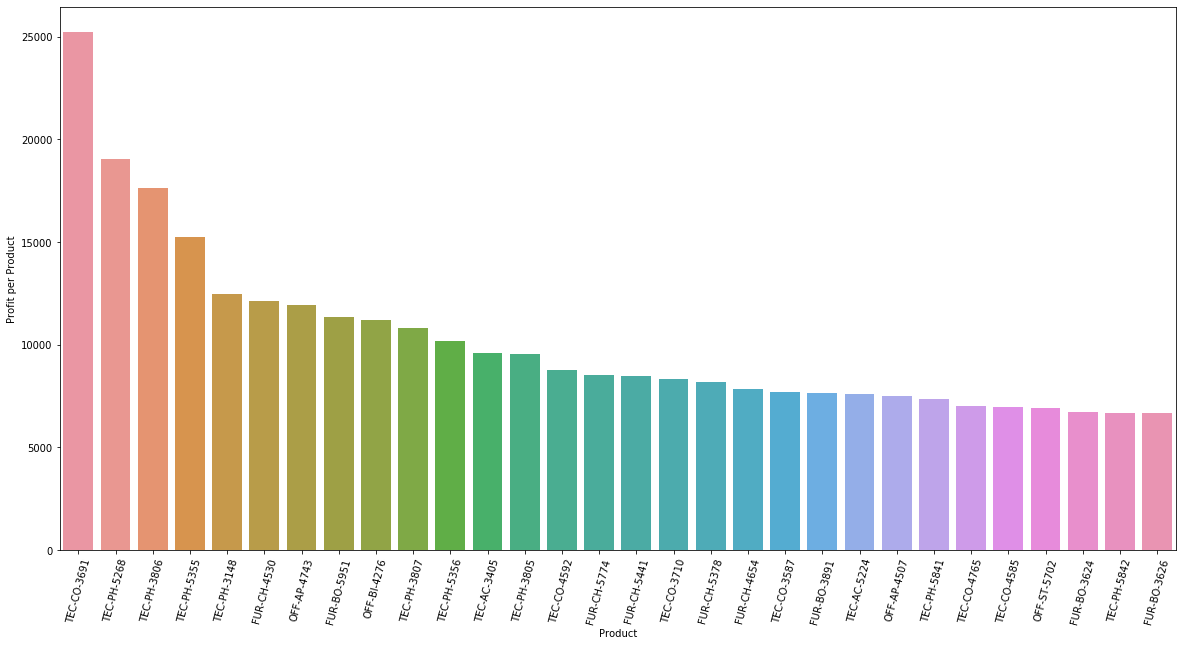

In [28]:
profit_per_product = data.groupby('Product ID')['Profit'].sum().sort_values(ascending=False).head(30)
plt.figure(figsize=(20, 10))
sns.barplot(profit_per_product.index, profit_per_product.values)
plt.ylabel('Profit per Product')
plt.xlabel('Product')
plt.xticks(rotation=75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

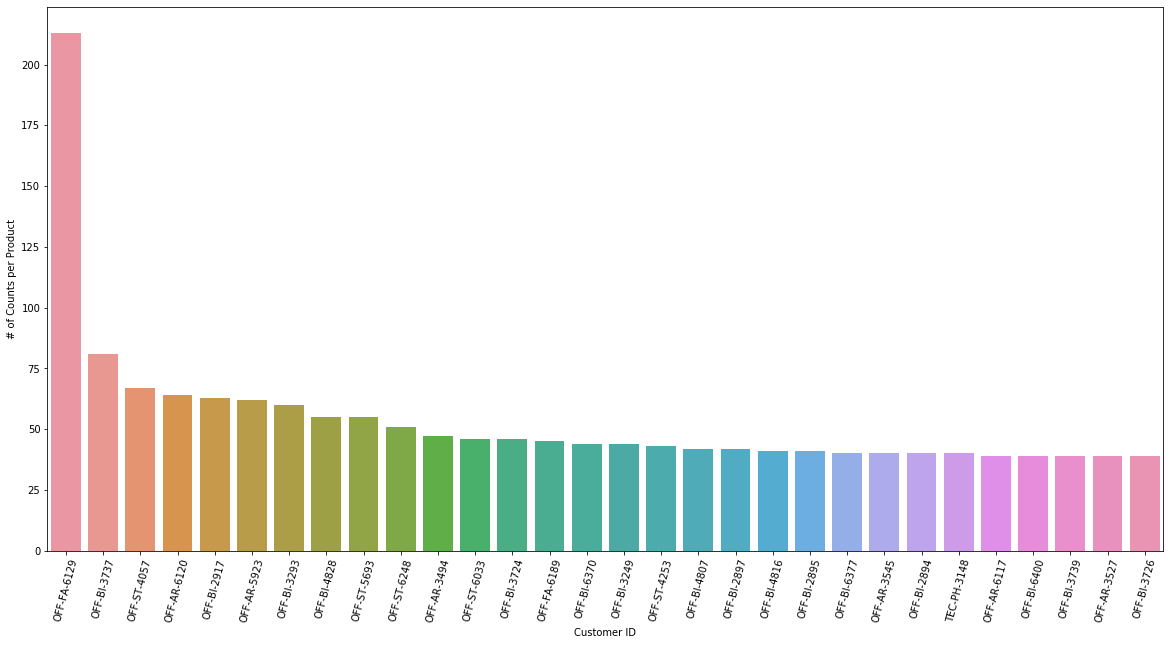

In [29]:
product_count = data['Product ID'].value_counts().sort_values(ascending=False).head(30)
plt.figure(figsize=(20, 10))
sns.barplot(product_count.index, product_count.values)
plt.ylabel('# of Counts per Product')
plt.xlabel('Customer ID')
plt.xticks(rotation=75)

In [30]:
data['Product ID'].nunique()

3717

In [31]:
data['Product Name'].nunique()

3717

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

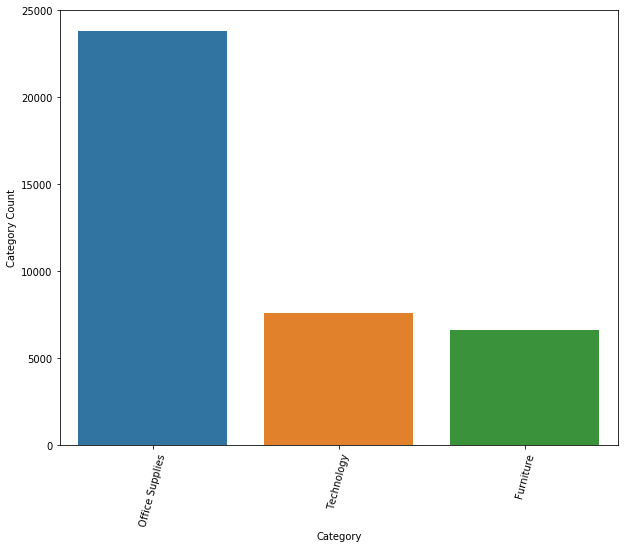

In [32]:
product_cat_count = data['Category'].value_counts().sort_values(ascending=False).head(30)
plt.figure(figsize=(10, 8))
sns.barplot(product_cat_count.index, product_cat_count.values)
plt.ylabel('Category Count')
plt.xlabel('Category')
plt.xticks(rotation=75)

Office Supplies were the highest category that the customers mostly ordered. This can be a future focus for the business to improve office supplies to possibly have the higest increase in profits. 

In [33]:
data['Category'].nunique()

3

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

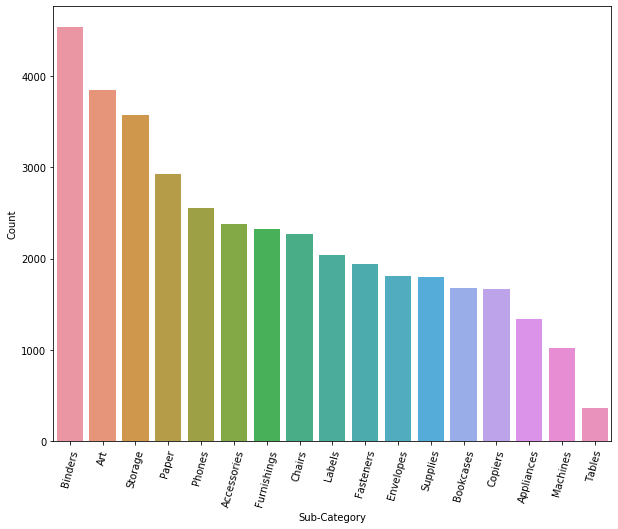

In [145]:
product_subcat_count = data['Sub-Category'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(product_subcat_count.index, product_subcat_count.values)
plt.ylabel('Count')
plt.xlabel('Sub-Category')
plt.xticks(rotation=75)

In [35]:
data['Sub-Category'].nunique()

17

Text(0.5, 0, 'Segment')

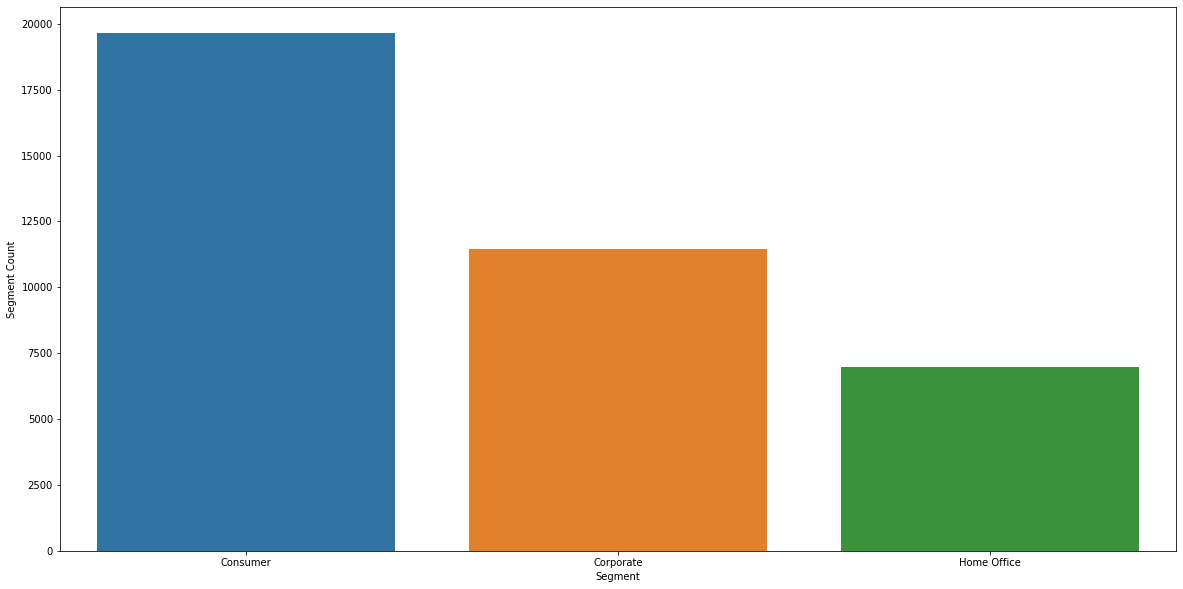

In [36]:
segment_count = data['Segment'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(segment_count.index, segment_count.values)
plt.ylabel('Segment Count')
plt.xlabel('Segment')

Text(0.5, 0, 'Ship Mode')

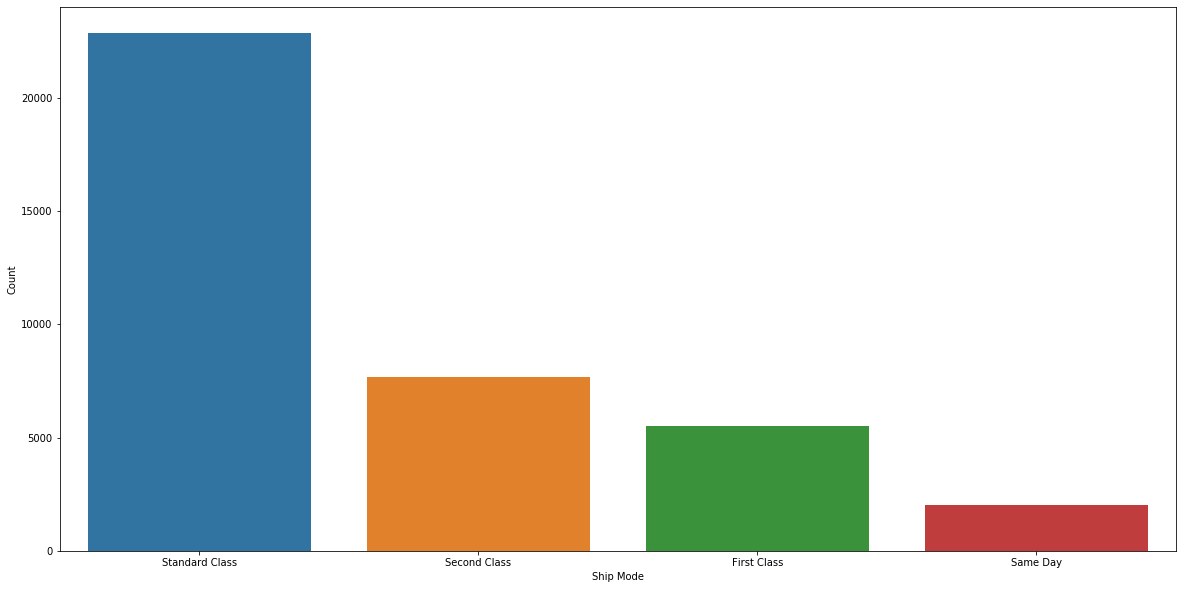

In [37]:
ship_mode_count = data['Ship Mode'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(ship_mode_count.index, ship_mode_count.values)
plt.ylabel('Count')
plt.xlabel('Ship Mode')

Text(0.5, 0, 'Order Priority')

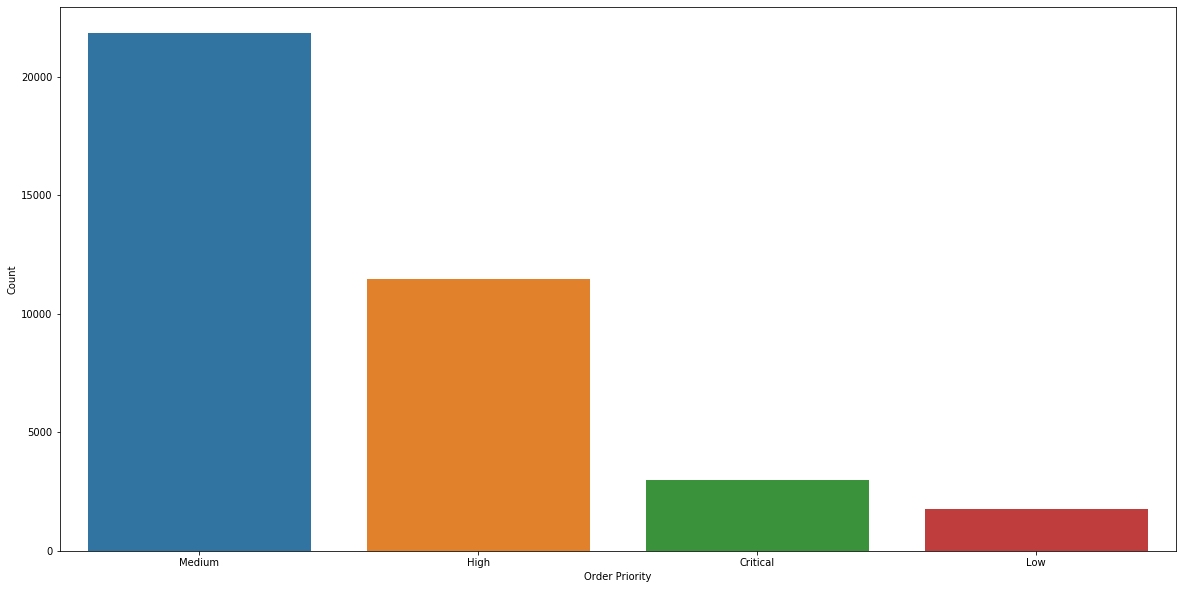

In [38]:
order_priority_count = data['Order Priority'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(order_priority_count.index, order_priority_count.values)
plt.ylabel('Count')
plt.xlabel('Order Priority')

In [39]:
data = data.drop(['Row ID', 'Ship Date', 'Customer Name', 'City', 'State', 'Shipping Cost', 'Country', 'State', 'City', 'Product Name'], axis=1)
data

Order ID Order Date       Ship Mode   Customer ID  \
0      CA-2014-AB10015140-41954 2014-11-11     First Class  AB-100151402   
2        IN-2014-CR127307-41929 2014-10-17     First Class     CR-127307   
4       SG-2014-RH9495111-41948 2014-11-05        Same Day    RH-9495111   
5        IN-2014-JM156557-41818 2014-06-28    Second Class     JM-156557   
6       IN-2012-TS2134092-41219 2012-11-06     First Class    TS-2134092   
...                         ...        ...             ...           ...   
51285   IN-2015-KE1642066-42174 2015-06-19        Same Day    KE-1642066   
51286  US-2014-ZD21925140-41765 2014-05-06  Standard Class  ZD-219251408   
51287  CA-2012-ZD21925140-41147 2012-08-26    Second Class  ZD-219251404   
51288   MX-2013-RB1979518-41322 2013-02-17  Standard Class    RB-1979518   
51289   MX-2013-MC1810093-41416 2013-05-22    Second Class    MC-1810093   

           Segment           Region        Market   Product ID  \
0         Consumer       Central US          USCA  TEC-PH-5816   
2         Consumer          Oceania  Asia Pacific  TEC-PH-5356   
4         Consumer   Western Africa        Africa  TEC-CO-6011   
5        Corporate          Oceania  Asia Pacific  TEC-PH-5842   
6         Consumer          Oceania  Asia Pacific  FUR-CH-5378   
...            ...              ...           ...          ...   
51285    Corporate     Eastern Asia  Asia Pacific  OFF-FA-3072   
51286     Consumer      Southern US          USCA  FUR-FU-4070   
51287     Consumer       Western US          USCA  OFF-AR-5321   
51288  Home Office    South America         LATAM  OFF-BI-2919   
51289     Consumer  Central America         LATAM  OFF-PA-3990   

              Category Sub-Category    Sales  Quantity  Profit Order Priority  \
0           Technology       Phones   221.98         2   62.15           High   
2           Technology       Phones  5175.17         9  919.97         Medium   
4           Technology      Copiers  2832.96         8  311.52       Critical   
5           Technology       Phones  2862.68         5  763.28       Critical   
6            Furniture       Chairs  1822.08         4  564.84       Critical   
...                ...          ...      ...       ...     ...            ...   
51285  Office Supplies    Fasteners    65.10         5    4.50         Medium   
51286        Furniture  Furnishings    16.72         5    3.34           High   
51287  Office Supplies          Art     8.56         2    2.48           High   
51288  Office Supplies      Binders    13.44         2    2.40         Medium   
51289  Office Supplies        Paper    61.38         3    1.80           High   

        Revenue  
0        443.96  
2      46576.53  
4      22663.68  
5      14313.40  
6       7288.32  
...         ...  
51285    325.50  
51286     83.60  
51287     17.12  
51288     26.88  
51289    184.14  

[38078 rows x 15 columns]

## Customer Segmentation

The customer's behavior will be segmented by the RFM analysis. RFM stands for Recency, Frequency, and Monetary value and each category is a key representation of customer traits. 
 - R: most recent activity from customer
 - F: how often the customers makes a transaction
 - M: the amount of spending by customer

Identifying customer behavior can bring tremendous value for the business. This can help focus on where to begin investing within the company to improve quality and retain customers. 

### Recent Purchase

In [40]:
from datetime import datetime

today = datetime.date(data['Order Date'].max())
print(today)

2015-12-31


In [41]:
start = datetime.date(data['Order Date'].min())
print(start)

2012-01-01


In [42]:
data['Date'] = pd.to_datetime(data['Order Date']).dt.date
data['Date']

0        2014-11-11
2        2014-10-17
4        2014-11-05
5        2014-06-28
6        2012-11-06
            ...    
51285    2015-06-19
51286    2014-05-06
51287    2012-08-26
51288    2013-02-17
51289    2013-05-22
Name: Date, Length: 38078, dtype: object

In [43]:
recent_purchase = data.groupby('Customer ID', as_index=False)['Order Date'].max()
recent_purchase['Order Date'] = pd.DatetimeIndex(recent_purchase['Order Date']).date
recent_purchase['Recency'] = today - recent_purchase['Order Date']
recent_purchase.columns = ['Customer ID', 'Order Date', 'Recency']
recent_purchase

Customer ID  Order Date   Recency
0       AA-10315102  2015-01-07  358 days
1       AA-10315120  2013-05-16  959 days
2       AA-10315139  2015-08-04  149 days
3      AA-103151402  2015-06-30  184 days
4      AA-103151404  2013-10-04  818 days
...             ...         ...       ...
14307    ZD-2192548  2013-12-11  750 days
14308    ZD-2192564  2012-02-21 1409 days
14309     ZD-219257  2012-09-19 1198 days
14310    ZD-2192582  2015-06-18  196 days
14311    ZD-2192596  2013-12-12  749 days

[14312 rows x 3 columns]

In [44]:
recent_purchase = recent_purchase.drop(['Order Date'], axis=1)
recent_purchase

Customer ID   Recency
0       AA-10315102  358 days
1       AA-10315120  959 days
2       AA-10315139  149 days
3      AA-103151402  184 days
4      AA-103151404  818 days
...             ...       ...
14307    ZD-2192548  750 days
14308    ZD-2192564 1409 days
14309     ZD-219257 1198 days
14310    ZD-2192582  196 days
14311    ZD-2192596  749 days

[14312 rows x 2 columns]

The recency category is made based on the last date of the dataset to have the most up-to-date data. 

### Frequency

In [45]:
frequency = data.groupby('Customer ID', as_index=False)['Order ID'].count()
frequency.columns = ['Customer ID', 'Frequency']
frequency

Customer ID  Frequency
0       AA-10315102          1
1       AA-10315120          1
2       AA-10315139         12
3      AA-103151402          5
4      AA-103151404          3
...             ...        ...
14307    ZD-2192548          3
14308    ZD-2192564          1
14309     ZD-219257          1
14310    ZD-2192582          2
14311    ZD-2192596          2

[14312 rows x 2 columns]

The frequency category is created to show how many orders were placed between 2012-2015 by each customer. 

### Spending

In [46]:
spending = data.groupby('Customer ID', as_index=False)['Revenue'].sum()
spending.columns = ['Customer ID', 'Spending']
spending

Customer ID  Spending
0       AA-10315102    348.51
1       AA-10315120  18993.87
2       AA-10315139   9707.91
3      AA-103151402   2702.18
4      AA-103151404   1507.02
...             ...       ...
14307    ZD-2192548    478.32
14308    ZD-2192564    490.86
14309     ZD-219257    239.76
14310    ZD-2192582   1946.32
14311    ZD-2192596   1476.33

[14312 rows x 2 columns]

The spending category is created to show how much each customer has spent in total between 2012-2015. 

#### Data Merge

In [47]:
test_data = pd.merge(recent_purchase, frequency, on = 'Customer ID')
test_data = pd.merge(test_data, spending, on = 'Customer ID')
test_data

Customer ID   Recency  Frequency  Spending
0       AA-10315102  358 days          1    348.51
1       AA-10315120  959 days          1  18993.87
2       AA-10315139  149 days         12   9707.91
3      AA-103151402  184 days          5   2702.18
4      AA-103151404  818 days          3   1507.02
...             ...       ...        ...       ...
14307    ZD-2192548  750 days          3    478.32
14308    ZD-2192564 1409 days          1    490.86
14309     ZD-219257 1198 days          1    239.76
14310    ZD-2192582  196 days          2   1946.32
14311    ZD-2192596  749 days          2   1476.33

[14312 rows x 4 columns]

In [48]:
test_data['Recency'] = test_data['Recency'].dt.days
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14312 entries, 0 to 14311
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  14312 non-null  object 
 1   Recency      14312 non-null  int64  
 2   Frequency    14312 non-null  int64  
 3   Spending     14312 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 559.1+ KB


In [49]:
quartiles = test_data.quantile(q=[0.25, 0.5, 0.75])
quartiles

Recency  Frequency   Spending
0.25    149.0        1.0   242.4000
0.50    425.0        2.0  1003.7400
0.75    809.0        3.0  3633.1425

In [50]:
test_data.describe()

Recency     Frequency       Spending
count  14312.000000  14312.000000   14312.000000
mean     510.882337      2.660565    3418.423026
std      401.153148      2.139745    6625.732420
min        0.000000      1.000000       2.060000
25%      149.000000      1.000000     242.400000
50%      425.000000      2.000000    1003.740000
75%      809.000000      3.000000    3633.142500
max     1460.000000     22.000000  134386.470000

The RFM categories are merged to create one dataframe that can be used for analysis. Here is a quick summary of each category. One thing to note is the minimum value of recency is 0 since the most recent purchase was the day of the last day of the dataset. 

In [51]:
recency_quartiles = range(3, 0, -1)
frequency_quartiles = range(1, 4)
spending_quartiles = range(1, 4)

Quartiles are created for each category. It is noted that the recency category is starting from 3 and going down in increments. This is since the most recent activity should be in the higher category since active customers are the one's to be desired. 

In [52]:
recency_group = pd.cut(test_data['Recency'], bins=3, labels=recency_quartiles)
puchase_count = pd.cut(test_data['Frequency'], bins=3, labels=frequency_quartiles)
spending = pd.cut(test_data['Spending'], bins=3, labels=spending_quartiles)

In [53]:
test_data['R'] = recency_group.values
test_data['F'] = puchase_count.values
test_data['M'] = spending.values
test_data['RFM_Score'] = test_data[['R', 'F', 'M']].sum(axis=1)
test_data

Customer ID  Recency  Frequency  Spending  R  F  M  RFM_Score
0       AA-10315102      358          1    348.51  3  1  1          5
1       AA-10315120      959          1  18993.87  2  1  1          4
2       AA-10315139      149         12   9707.91  3  2  1          6
3      AA-103151402      184          5   2702.18  3  1  1          5
4      AA-103151404      818          3   1507.02  2  1  1          4
...             ...      ...        ...       ... .. .. ..        ...
14307    ZD-2192548      750          3    478.32  2  1  1          4
14308    ZD-2192564     1409          1    490.86  1  1  1          3
14309     ZD-219257     1198          1    239.76  1  1  1          3
14310    ZD-2192582      196          2   1946.32  3  1  1          5
14311    ZD-2192596      749          2   1476.33  2  1  1          4

[14312 rows x 8 columns]

The categories are given a value and the values are summed to create an RFM score. The highest value will be a 9 and the lower value will be a 3. 

In [54]:
test_data['RFM_Score'].unique()

array([5, 4, 6, 3, 7, 8], dtype=int64)

In [55]:
def Customer_levels(test_data):
    if test_data['RFM_Score'] >= 8:
        return "Elite"
    elif test_data['RFM_Score'] >= 6:
        return "High"
    elif test_data['RFM_Score'] >= 4:
        return "Medium"
    else:
        return "Low"

In [56]:
test_data['Customer_Score'] = test_data.apply(Customer_levels, axis=1)
test_data

Customer ID  Recency  Frequency  Spending  R  F  M  RFM_Score  \
0       AA-10315102      358          1    348.51  3  1  1          5   
1       AA-10315120      959          1  18993.87  2  1  1          4   
2       AA-10315139      149         12   9707.91  3  2  1          6   
3      AA-103151402      184          5   2702.18  3  1  1          5   
4      AA-103151404      818          3   1507.02  2  1  1          4   
...             ...      ...        ...       ... .. .. ..        ...   
14307    ZD-2192548      750          3    478.32  2  1  1          4   
14308    ZD-2192564     1409          1    490.86  1  1  1          3   
14309     ZD-219257     1198          1    239.76  1  1  1          3   
14310    ZD-2192582      196          2   1946.32  3  1  1          5   
14311    ZD-2192596      749          2   1476.33  2  1  1          4   

      Customer_Score  
0             Medium  
1             Medium  
2               High  
3             Medium  
4             Medium  
...              ...  
14307         Medium  
14308            Low  
14309            Low  
14310         Medium  
14311         Medium  

[14312 rows x 9 columns]

The customers are segmented and given a Customer score. The customers can now be easily identified based on there behaviors, how well they compare to other customers based on recency, frequency, and monetary. The business can utilize this in ways to help focus on customers that bring in the most profitiablity and engagement for the business. This is a great opportunity for the marketing team to focus on the higher score customers. 

In [57]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14312 entries, 0 to 14311
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Customer ID     14312 non-null  object  
 1   Recency         14312 non-null  int64   
 2   Frequency       14312 non-null  int64   
 3   Spending        14312 non-null  float64 
 4   R               14312 non-null  category
 5   F               14312 non-null  category
 6   M               14312 non-null  category
 7   RFM_Score       14312 non-null  int64   
 8   Customer_Score  14312 non-null  object  
dtypes: category(3), float64(1), int64(3), object(2)
memory usage: 825.0+ KB


In [58]:
test_data['R'] = test_data['R'].astype(int)
test_data['F'] = test_data['F'].astype(int)
test_data['M'] = test_data['M'].astype(int)
test_data.dtypes

Customer ID        object
Recency             int64
Frequency           int64
Spending          float64
R                   int32
F                   int32
M                   int32
RFM_Score           int64
Customer_Score     object
dtype: object

Minor changes to the data for further analysis. 

## Pre-Processing

The insight on the new categorical data. 

In [59]:
data.head()

Order ID Order Date     Ship Mode   Customer ID    Segment  \
0  CA-2014-AB10015140-41954 2014-11-11   First Class  AB-100151402   Consumer   
2    IN-2014-CR127307-41929 2014-10-17   First Class     CR-127307   Consumer   
4   SG-2014-RH9495111-41948 2014-11-05      Same Day    RH-9495111   Consumer   
5    IN-2014-JM156557-41818 2014-06-28  Second Class     JM-156557  Corporate   
6   IN-2012-TS2134092-41219 2012-11-06   First Class    TS-2134092   Consumer   

           Region        Market   Product ID    Category Sub-Category  \
0      Central US          USCA  TEC-PH-5816  Technology       Phones   
2         Oceania  Asia Pacific  TEC-PH-5356  Technology       Phones   
4  Western Africa        Africa  TEC-CO-6011  Technology      Copiers   
5         Oceania  Asia Pacific  TEC-PH-5842  Technology       Phones   
6         Oceania  Asia Pacific  FUR-CH-5378   Furniture       Chairs   

     Sales  Quantity  Profit Order Priority   Revenue        Date  
0   221.98         2   62.15           High    443.96  2014-11-11  
2  5175.17         9  919.97         Medium  46576.53  2014-10-17  
4  2832.96         8  311.52       Critical  22663.68  2014-11-05  
5  2862.68         5  763.28       Critical  14313.40  2014-06-28  
6  1822.08         4  564.84       Critical   7288.32  2012-11-06

In [60]:
test_data.head()

Customer ID  Recency  Frequency  Spending  R  F  M  RFM_Score  \
0   AA-10315102      358          1    348.51  3  1  1          5   
1   AA-10315120      959          1  18993.87  2  1  1          4   
2   AA-10315139      149         12   9707.91  3  2  1          6   
3  AA-103151402      184          5   2702.18  3  1  1          5   
4  AA-103151404      818          3   1507.02  2  1  1          4   

  Customer_Score  
0         Medium  
1         Medium  
2           High  
3         Medium  
4         Medium

In [61]:
test_data = pd.merge(test_data, data, on = 'Customer ID')
test_data

Customer ID  Recency  Frequency  Spending  R  F  M  RFM_Score  \
0      AA-10315102      358          1    348.51  3  1  1          5   
1      AA-10315120      959          1  18993.87  2  1  1          4   
2      AA-10315139      149         12   9707.91  3  2  1          6   
3      AA-10315139      149         12   9707.91  3  2  1          6   
4      AA-10315139      149         12   9707.91  3  2  1          6   
...            ...      ...        ...       ... .. .. ..        ...   
38073    ZD-219257     1198          1    239.76  1  1  1          3   
38074   ZD-2192582      196          2   1946.32  3  1  1          5   
38075   ZD-2192582      196          2   1946.32  3  1  1          5   
38076   ZD-2192596      749          2   1476.33  2  1  1          4   
38077   ZD-2192596      749          2   1476.33  2  1  1          4   

      Customer_Score                  Order ID  ...        Market  \
0             Medium  ID-2015-AA10315102-42011  ...  Asia Pacific   
1             Medium  ES-2013-AA10315120-41410  ...        Europe   
2               High  ES-2015-AA10315139-42220  ...        Europe   
3               High  ES-2015-AA10315139-42220  ...        Europe   
4               High  ES-2015-AA10315139-42220  ...        Europe   
...              ...                       ...  ...           ...   
38073            Low    IN-2012-ZD219257-41171  ...  Asia Pacific   
38074         Medium   MX-2015-ZD2192582-42173  ...         LATAM   
38075         Medium   MX-2013-ZD2192582-41604  ...         LATAM   
38076         Medium   IT-2013-ZD2192596-41620  ...        Europe   
38077         Medium   IT-2013-ZD2192596-41620  ...        Europe   

        Product ID         Category Sub-Category    Sales Quantity  Profit  \
0      TEC-MA-5001       Technology     Machines   116.17        3   35.62   
1      FUR-BO-5969        Furniture    Bookcases  2713.41        7   27.09   
2      TEC-PH-5813       Technology       Phones   504.36        3   65.52   
3      TEC-PH-5358       Technology       Phones   622.20        5  124.35   
4      FUR-BO-3634        Furniture    Bookcases   512.19        3   46.08   
...            ...              ...          ...      ...      ...     ...   
38073  OFF-FA-6200  Office Supplies    Fasteners    59.94        4   11.94   
38074  TEC-CO-6000       Technology      Copiers   590.12        3   69.74   
38075  FUR-FU-6253        Furniture  Furnishings    87.98        2    7.30   
38076  TEC-AC-5220       Technology  Accessories   135.63        3   40.68   
38077  OFF-PA-5892  Office Supplies        Paper   133.68        8   25.20   

      Order Priority   Revenue        Date  
0             Medium    348.51  2015-01-07  
1             Medium  18993.87  2013-05-16  
2               High   1513.08  2015-08-04  
3               High   3111.00  2015-08-04  
4               High   1536.57  2015-08-04  
...              ...       ...         ...  
38073         Medium    239.76  2012-09-19  
38074       Critical   1770.36  2015-06-18  
38075            Low    175.96  2013-11-26  
38076         Medium    406.89  2013-12-12  
38077         Medium   1069.44  2013-12-12  

[38078 rows x 24 columns]

In [62]:
df = px.data.tips()
fig = px.histogram(test_data, x="Customer_Score", color='Customer_Score')
fig.show()

In [63]:
df = px.data.tips()
fig = px.histogram(test_data, x="Recency")
fig.show()

In [64]:
df = px.data.tips()
fig = px.histogram(test_data, x="Frequency")
fig.show()

In [65]:
df = px.data.tips()
fig = px.histogram(test_data, x="Spending")
fig.show()

The RFM data shows that each category is heavily right-skewed. The data needs to be unskewed to create a better dataset for the prediction model. 

In [66]:
test_data.columns

Index(['Customer ID', 'Recency', 'Frequency', 'Spending', 'R', 'F', 'M',
       'RFM_Score', 'Customer_Score', 'Order ID', 'Order Date', 'Ship Mode',
       'Segment', 'Region', 'Market', 'Product ID', 'Category', 'Sub-Category',
       'Sales', 'Quantity', 'Profit', 'Order Priority', 'Revenue', 'Date'],
      dtype='object')

In [67]:
test_data.head()

Customer ID  Recency  Frequency  Spending  R  F  M  RFM_Score  \
0  AA-10315102      358          1    348.51  3  1  1          5   
1  AA-10315120      959          1  18993.87  2  1  1          4   
2  AA-10315139      149         12   9707.91  3  2  1          6   
3  AA-10315139      149         12   9707.91  3  2  1          6   
4  AA-10315139      149         12   9707.91  3  2  1          6   

  Customer_Score                  Order ID  ...        Market   Product ID  \
0         Medium  ID-2015-AA10315102-42011  ...  Asia Pacific  TEC-MA-5001   
1         Medium  ES-2013-AA10315120-41410  ...        Europe  FUR-BO-5969   
2           High  ES-2015-AA10315139-42220  ...        Europe  TEC-PH-5813   
3           High  ES-2015-AA10315139-42220  ...        Europe  TEC-PH-5358   
4           High  ES-2015-AA10315139-42220  ...        Europe  FUR-BO-3634   

     Category Sub-Category    Sales Quantity  Profit Order Priority   Revenue  \
0  Technology     Machines   116.17        3   35.62         Medium    348.51   
1   Furniture    Bookcases  2713.41        7   27.09         Medium  18993.87   
2  Technology       Phones   504.36        3   65.52           High   1513.08   
3  Technology       Phones   622.20        5  124.35           High   3111.00   
4   Furniture    Bookcases   512.19        3   46.08           High   1536.57   

         Date  
0  2015-01-07  
1  2013-05-16  
2  2015-08-04  
3  2015-08-04  
4  2015-08-04  

[5 rows x 24 columns]

In [68]:
test_data = test_data.drop(['Customer_Score', 'Customer ID', 'Product ID', 'Order Date', 'Order ID', 'Date', 'Profit', 
                            'Sales', 'Revenue', 'Quantity', 'Profit'], axis=1)
test_data

Recency  Frequency  Spending  R  F  M  RFM_Score       Ship Mode  \
0          358          1    348.51  3  1  1          5  Standard Class   
1          959          1  18993.87  2  1  1          4  Standard Class   
2          149         12   9707.91  3  2  1          6    Second Class   
3          149         12   9707.91  3  2  1          6    Second Class   
4          149         12   9707.91  3  2  1          6    Second Class   
...        ...        ...       ... .. .. ..        ...             ...   
38073     1198          1    239.76  1  1  1          3    Second Class   
38074      196          2   1946.32  3  1  1          5    Second Class   
38075      196          2   1946.32  3  1  1          5  Standard Class   
38076      749          2   1476.33  2  1  1          4  Standard Class   
38077      749          2   1476.33  2  1  1          4  Standard Class   

        Segment             Region        Market         Category  \
0      Consumer  Southeastern Asia  Asia Pacific       Technology   
1      Consumer    Southern Europe        Europe        Furniture   
2      Consumer    Northern Europe        Europe       Technology   
3      Consumer    Northern Europe        Europe       Technology   
4      Consumer    Northern Europe        Europe        Furniture   
...         ...                ...           ...              ...   
38073  Consumer            Oceania  Asia Pacific  Office Supplies   
38074  Consumer    Central America         LATAM       Technology   
38075  Consumer    Central America         LATAM        Furniture   
38076  Consumer    Northern Europe        Europe       Technology   
38077  Consumer    Northern Europe        Europe  Office Supplies   

      Sub-Category Order Priority  
0         Machines         Medium  
1        Bookcases         Medium  
2           Phones           High  
3           Phones           High  
4        Bookcases           High  
...            ...            ...  
38073    Fasteners         Medium  
38074      Copiers       Critical  
38075  Furnishings            Low  
38076  Accessories         Medium  
38077        Paper         Medium  

[38078 rows x 14 columns]

More features were added with the RFM segmentation to create a model that will use more specifications to identify customer behaviors. Not all columns will be used due to the increase of dimensionality and computational power. The get_dummies were used on the categorical data in order for the model to have a numerical value. 

In [69]:
dummy = ['Ship Mode', 'Segment', 'Region', 'Market', 'Category', 'Sub-Category', 'Order Priority']

In [70]:
new_X = test_data[dummy]

In [71]:
new_X = pd.get_dummies(new_X)

In [72]:
new_X.shape

(38078, 59)

In [73]:
test_data = pd.concat([test_data, new_X], axis=1)
test_data.head()

Recency  Frequency  Spending  R  F  M  RFM_Score       Ship Mode   Segment  \
0      358          1    348.51  3  1  1          5  Standard Class  Consumer   
1      959          1  18993.87  2  1  1          4  Standard Class  Consumer   
2      149         12   9707.91  3  2  1          6    Second Class  Consumer   
3      149         12   9707.91  3  2  1          6    Second Class  Consumer   
4      149         12   9707.91  3  2  1          6    Second Class  Consumer   

              Region  ... Sub-Category_Machines Sub-Category_Paper  \
0  Southeastern Asia  ...                     1                  0   
1    Southern Europe  ...                     0                  0   
2    Northern Europe  ...                     0                  0   
3    Northern Europe  ...                     0                  0   
4    Northern Europe  ...                     0                  0   

  Sub-Category_Phones Sub-Category_Storage  Sub-Category_Supplies  \
0                   0                    0                      0   
1                   0                    0                      0   
2                   1                    0                      0   
3                   1                    0                      0   
4                   0                    0                      0   

   Sub-Category_Tables  Order Priority_Critical  Order Priority_High  \
0                    0                        0                    0   
1                    0                        0                    0   
2                    0                        0                    1   
3                    0                        0                    1   
4                    0                        0                    1   

   Order Priority_Low  Order Priority_Medium  
0                   0                      1  
1                   0                      1  
2                   0                      0  
3                   0                      0  
4                   0                      0  

[5 rows x 73 columns]

In [74]:
test_data.columns

Index(['Recency', 'Frequency', 'Spending', 'R', 'F', 'M', 'RFM_Score',
       'Ship Mode', 'Segment', 'Region', 'Market', 'Category', 'Sub-Category',
       'Order Priority', 'Ship Mode_First Class', 'Ship Mode_Same Day',
       'Ship Mode_Second Class', 'Ship Mode_Standard Class',
       'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office',
       'Region_Canada', 'Region_Caribbean', 'Region_Central Africa',
       'Region_Central America', 'Region_Central Asia', 'Region_Central US',
       'Region_Eastern Africa', 'Region_Eastern Asia', 'Region_Eastern Europe',
       'Region_Eastern US', 'Region_North Africa', 'Region_Northern Europe',
       'Region_Oceania', 'Region_South America', 'Region_Southeastern Asia',
       'Region_Southern Africa', 'Region_Southern Asia',
       'Region_Southern Europe', 'Region_Southern US', 'Region_Western Africa',
       'Region_Western Asia', 'Region_Western Europe', 'Region_Western US',
       'Market_Africa', 'Market_Asia Pacific', 'Marke

In [75]:
test_data = test_data.drop(columns=['Ship Mode', 'Segment', 'Region', 'Market', 'Category', 'Sub-Category', 'Order Priority'])
test_data

Recency  Frequency  Spending  R  F  M  RFM_Score  \
0          358          1    348.51  3  1  1          5   
1          959          1  18993.87  2  1  1          4   
2          149         12   9707.91  3  2  1          6   
3          149         12   9707.91  3  2  1          6   
4          149         12   9707.91  3  2  1          6   
...        ...        ...       ... .. .. ..        ...   
38073     1198          1    239.76  1  1  1          3   
38074      196          2   1946.32  3  1  1          5   
38075      196          2   1946.32  3  1  1          5   
38076      749          2   1476.33  2  1  1          4   
38077      749          2   1476.33  2  1  1          4   

       Ship Mode_First Class  Ship Mode_Same Day  Ship Mode_Second Class  ...  \
0                          0                   0                       0  ...   
1                          0                   0                       0  ...   
2                          0                   0                       1  ...   
3                          0                   0                       1  ...   
4                          0                   0                       1  ...   
...                      ...                 ...                     ...  ...   
38073                      0                   0                       1  ...   
38074                      0                   0                       1  ...   
38075                      0                   0                       0  ...   
38076                      0                   0                       0  ...   
38077                      0                   0                       0  ...   

       Sub-Category_Machines  Sub-Category_Paper  Sub-Category_Phones  \
0                          1                   0                    0   
1                          0                   0                    0   
2                          0                   0                    1   
3                          0                   0                    1   
4                          0                   0                    0   
...                      ...                 ...                  ...   
38073                      0                   0                    0   
38074                      0                   0                    0   
38075                      0                   0                    0   
38076                      0                   0                    0   
38077                      0                   1                    0   

       Sub-Category_Storage  Sub-Category_Supplies  Sub-Category_Tables  \
0                         0                      0                    0   
1                         0                      0                    0   
2                         0                      0                    0   
3                         0                      0                    0   
4                         0                      0                    0   
...                     ...                    ...                  ...   
38073                     0                      0                    0   
38074                     0                      0                    0   
38075                     0                      0                    0   
38076                     0                      0                    0   
38077                     0                      0                    0   

       Order Priority_Critical  Order Priority_High  Order Priority_Low  \
0                            0                    0                   0   
1                            0                    0                   0   
2                            0                    1                   0   
3                            0                    1                   0   
4                            0                    1                   0   
...                        ...                  ...                 ...   
38073                 

The Customer ID and Score are dropped to decrease dimensionality and overfitting of the data. 

In [76]:
test_data.describe()

Recency     Frequency       Spending             R             F  \
count  38078.000000  38078.000000   38078.000000  38078.000000  38078.000000   
mean     441.535716      4.381323    5717.051968      2.509769      1.104549   
std      380.715957      3.016884    8761.709872      0.698425      0.320070   
min        0.000000      1.000000       2.060000      1.000000      1.000000   
25%      116.000000      2.000000     711.720000      2.000000      1.000000   
50%      352.000000      4.000000    2607.600000      3.000000      1.000000   
75%      705.000000      6.000000    7070.310000      3.000000      1.000000   
max     1460.000000     22.000000  134386.470000      3.000000      3.000000   

                  M     RFM_Score  Ship Mode_First Class  Ship Mode_Same Day  \
count  38078.000000  38078.000000           38078.000000        38078.000000   
mean       1.008929      4.623247               0.144861            0.053075   
std        0.101070      0.820578               0.351965            0.224187   
min        1.000000      3.000000               0.000000            0.000000   
25%        1.000000      4.000000               0.000000            0.000000   
50%        1.000000      5.000000               0.000000            0.000000   
75%        1.000000      5.000000               0.000000            0.000000   
max        3.000000      8.000000               1.000000            1.000000   

       Ship Mode_Second Class  ...  Sub-Category_Machines  Sub-Category_Paper  \
count            38078.000000  ...           38078.000000        38078.000000   
mean                 0.201901  ...               0.026787            0.076895   
std                  0.401424  ...               0.161463            0.266428   
min                  0.000000  ...               0.000000            0.000000   
25%                  0.000000  ...               0.000000            0.000000   
50%                  0.000000  ...               0.000000            0.000000   
75%                  0.000000  ...               0.000000            0.000000   
max                  1.000000  ...               1.000000            1.000000   

       Sub-Category_Phones  Sub-Category_Storage  Sub-Category_Supplies  \
count         38078.000000          38078.000000           38078.000000   
mean              0.067125              0.093807               0.047245   
std               0.250242              0.291564               0.212166   
min               0.000000              0.000000               0.000000   
25%               0.000000              0.000000               0.000000   
50%               0.000000              0.000000               0.000000   
75%               0.000000              0.000000               0.000000   
max               1.000000              1.000000               1.000000   

       Sub-Category_Tables  Order Priority_Critical  Order Priority_High  \
count         38078.000000             38078.000000         38078.000000   
mean              0.009454                 0.077998             0.301329   
std               0.096774                 0.268172             0.458841   
min               0.000000                 0.000000             0.000000   
25%               0.000000                 0.000000             0.000000   
50%               0.000000                 0.000000             0.000000   
75%               0.000000                 0.000000             1.000000   
max               1.000000                 1.000000             1.000000   

       Order Priority_Low  Order Priority_Medium  
count        38078.000000           38078.000000  
mean             0.046877               0.573796  
std              0.211379               0.494531  
min              0.000000               0.000000  
25%              0.000000               0.000000  
50%              0.000000               1.000000  
75%              0.000000               1.000000  
max              1.000000               1.000000  

[8 rows x 66 column

In [77]:
test_data['Recency'] += 1

In [78]:
test_data.describe()

Recency     Frequency       Spending             R             F  \
count  38078.000000  38078.000000   38078.000000  38078.000000  38078.000000   
mean     442.535716      4.381323    5717.051968      2.509769      1.104549   
std      380.715957      3.016884    8761.709872      0.698425      0.320070   
min        1.000000      1.000000       2.060000      1.000000      1.000000   
25%      117.000000      2.000000     711.720000      2.000000      1.000000   
50%      353.000000      4.000000    2607.600000      3.000000      1.000000   
75%      706.000000      6.000000    7070.310000      3.000000      1.000000   
max     1461.000000     22.000000  134386.470000      3.000000      3.000000   

                  M     RFM_Score  Ship Mode_First Class  Ship Mode_Same Day  \
count  38078.000000  38078.000000           38078.000000        38078.000000   
mean       1.008929      4.623247               0.144861            0.053075   
std        0.101070      0.820578               0.351965            0.224187   
min        1.000000      3.000000               0.000000            0.000000   
25%        1.000000      4.000000               0.000000            0.000000   
50%        1.000000      5.000000               0.000000            0.000000   
75%        1.000000      5.000000               0.000000            0.000000   
max        3.000000      8.000000               1.000000            1.000000   

       Ship Mode_Second Class  ...  Sub-Category_Machines  Sub-Category_Paper  \
count            38078.000000  ...           38078.000000        38078.000000   
mean                 0.201901  ...               0.026787            0.076895   
std                  0.401424  ...               0.161463            0.266428   
min                  0.000000  ...               0.000000            0.000000   
25%                  0.000000  ...               0.000000            0.000000   
50%                  0.000000  ...               0.000000            0.000000   
75%                  0.000000  ...               0.000000            0.000000   
max                  1.000000  ...               1.000000            1.000000   

       Sub-Category_Phones  Sub-Category_Storage  Sub-Category_Supplies  \
count         38078.000000          38078.000000           38078.000000   
mean              0.067125              0.093807               0.047245   
std               0.250242              0.291564               0.212166   
min               0.000000              0.000000               0.000000   
25%               0.000000              0.000000               0.000000   
50%               0.000000              0.000000               0.000000   
75%               0.000000              0.000000               0.000000   
max               1.000000              1.000000               1.000000   

       Sub-Category_Tables  Order Priority_Critical  Order Priority_High  \
count         38078.000000             38078.000000         38078.000000   
mean              0.009454                 0.077998             0.301329   
std               0.096774                 0.268172             0.458841   
min               0.000000                 0.000000             0.000000   
25%               0.000000                 0.000000             0.000000   
50%               0.000000                 0.000000             0.000000   
75%               0.000000                 0.000000             1.000000   
max               1.000000                 1.000000             1.000000   

       Order Priority_Low  Order Priority_Medium  
count        38078.000000           38078.000000  
mean             0.046877               0.573796  
std              0.211379               0.494531  
min              0.000000               0.000000  
25%              0.000000               0.000000  
50%              0.000000               1.000000  
75%              0.000000               1.000000  
max              1.000000               1.000000  

[8 rows x 66 column

1 is added to the entire dataset to take the log of the data. This will unskew the data, which we can then scale the data. 

In [79]:
test_data['Recency'] = np.log(test_data['Recency'])

In [80]:
test_data.describe()

Recency     Frequency       Spending             R             F  \
count  38078.000000  38078.000000   38078.000000  38078.000000  38078.000000   
mean       5.523146      4.381323    5717.051968      2.509769      1.104549   
std        1.303638      3.016884    8761.709872      0.698425      0.320070   
min        0.000000      1.000000       2.060000      1.000000      1.000000   
25%        4.762174      2.000000     711.720000      2.000000      1.000000   
50%        5.866468      4.000000    2607.600000      3.000000      1.000000   
75%        6.559615      6.000000    7070.310000      3.000000      1.000000   
max        7.286876     22.000000  134386.470000      3.000000      3.000000   

                  M     RFM_Score  Ship Mode_First Class  Ship Mode_Same Day  \
count  38078.000000  38078.000000           38078.000000        38078.000000   
mean       1.008929      4.623247               0.144861            0.053075   
std        0.101070      0.820578               0.351965            0.224187   
min        1.000000      3.000000               0.000000            0.000000   
25%        1.000000      4.000000               0.000000            0.000000   
50%        1.000000      5.000000               0.000000            0.000000   
75%        1.000000      5.000000               0.000000            0.000000   
max        3.000000      8.000000               1.000000            1.000000   

       Ship Mode_Second Class  ...  Sub-Category_Machines  Sub-Category_Paper  \
count            38078.000000  ...           38078.000000        38078.000000   
mean                 0.201901  ...               0.026787            0.076895   
std                  0.401424  ...               0.161463            0.266428   
min                  0.000000  ...               0.000000            0.000000   
25%                  0.000000  ...               0.000000            0.000000   
50%                  0.000000  ...               0.000000            0.000000   
75%                  0.000000  ...               0.000000            0.000000   
max                  1.000000  ...               1.000000            1.000000   

       Sub-Category_Phones  Sub-Category_Storage  Sub-Category_Supplies  \
count         38078.000000          38078.000000           38078.000000   
mean              0.067125              0.093807               0.047245   
std               0.250242              0.291564               0.212166   
min               0.000000              0.000000               0.000000   
25%               0.000000              0.000000               0.000000   
50%               0.000000              0.000000               0.000000   
75%               0.000000              0.000000               0.000000   
max               1.000000              1.000000               1.000000   

       Sub-Category_Tables  Order Priority_Critical  Order Priority_High  \
count         38078.000000             38078.000000         38078.000000   
mean              0.009454                 0.077998             0.301329   
std               0.096774                 0.268172             0.458841   
min               0.000000                 0.000000             0.000000   
25%               0.000000                 0.000000             0.000000   
50%               0.000000                 0.000000             0.000000   
75%               0.000000                 0.000000             1.000000   
max               1.000000                 1.000000             1.000000   

       Order Priority_Low  Order Priority_Medium  
count        38078.000000           38078.000000  
mean             0.046877               0.573796  
std              0.211379               0.494531  
min              0.000000               0.000000  
25%              0.000000               0.000000  
50%              0.000000               1.000000  
75%              0.000000               1.000000  
max              1.000000               1.000000  

[8 rows x 66 column

In [81]:
scaler = StandardScaler()

In [82]:
scaler.fit(test_data)
data_scaled = scaler.transform(test_data)
data_scaled = pd.DataFrame(data=data_scaled, index=test_data.index, columns=test_data.columns)
data_scaled

Recency  Frequency  Spending         R         F         M  RFM_Score  \
0      0.276289  -1.120814 -0.612736  0.701918 -0.326647 -0.088346   0.459137   
1      1.030811  -1.120814  1.515343 -0.729894 -0.326647 -0.088346  -0.759532   
2     -0.393144   2.525380  0.455494  0.701918  2.797710 -0.088346   1.677806   
3     -0.393144   2.525380  0.455494  0.701918  2.797710 -0.088346   1.677806   
4     -0.393144   2.525380  0.455494  0.701918  2.797710 -0.088346   1.677806   
...         ...        ...       ...       ...       ...       ...        ...   
38073  1.201344  -1.120814 -0.625148 -2.161706 -0.326647 -0.088346  -1.978200   
38074 -0.184058  -0.789342 -0.430371  0.701918 -0.326647 -0.088346   0.459137   
38075 -0.184058  -0.789342 -0.430371  0.701918 -0.326647 -0.088346   0.459137   
38076  0.841446  -0.789342 -0.484013 -0.729894 -0.326647 -0.088346  -0.759532   
38077  0.841446  -0.789342 -0.484013 -0.729894 -0.326647 -0.088346  -0.759532   

       Ship Mode_First Class  Ship Mode_Same Day  Ship Mode_Second Class  ...  \
0                  -0.411582           -0.236749               -0.502969  ...   
1                  -0.411582           -0.236749               -0.502969  ...   
2                  -0.411582           -0.236749                1.988194  ...   
3                  -0.411582           -0.236749                1.988194  ...   
4                  -0.411582           -0.236749                1.988194  ...   
...                      ...                 ...                     ...  ...   
38073              -0.411582           -0.236749                1.988194  ...   
38074              -0.411582           -0.236749                1.988194  ...   
38075              -0.411582           -0.236749               -0.502969  ...   
38076              -0.411582           -0.236749               -0.502969  ...   
38077              -0.411582           -0.236749               -0.502969  ...   

       Sub-Category_Machines  Sub-Category_Paper  Sub-Category_Phones  \
0                   6.027551           -0.288618            -0.268245   
1                  -0.165905           -0.288618            -0.268245   
2                  -0.165905           -0.288618             3.727935   
3                  -0.165905           -0.288618             3.727935   
4                  -0.165905           -0.288618            -0.268245   
...                      ...                 ...                  ...   
38073              -0.165905           -0.288618            -0.268245   
38074              -0.165905           -0.288618            -0.268245   
38075              -0.165905           -0.288618            -0.268245   
38076              -0.165905           -0.288618            -0.268245   
38077              -0.165905            3.464792            -0.268245   

       Sub-Category_Storage  Sub-Category_Supplies  Sub-Category_Tables  \
0                 -0.321742              -0.222683            -0.097696   
1                 -0.321742              -0.222683            -0.097696   
2                 -0.321742              -0.222683            -0.097696   
3                 -0.321742              -0.222683            -0.097696   
4                 -0.321742              -0.222683            -0.097696   
...                     ...                    ...                  ...   
38073             -0.321742              -0.222683            -0.097696   
38074             -0.321742              -0.222683            -0.097696   
38075             -0.321742              -0.222683            -0.097696   
38076             -0.321742              -0.222683            -0.097696   
38077             -0.321742              -0.222683            -0.097696   

       Order Priority_Critical  Order Priority_High  Order Priority_Low  \
0                    -0.290854            -0.656726           -0.221772   
1                    -0.290854            -0.656726           -0.221772   
2                    -0.290854             1.522706        

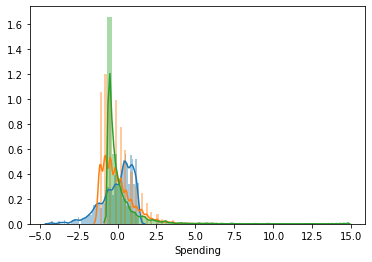

In [83]:
sns.distplot(data_scaled['Recency'])
sns.distplot(data_scaled['Frequency'])
sns.distplot(data_scaled['Spending'])
plt.show()

The data shows a much better distribution across the data and is not heavily right-skewed prior to the log and scale. After the data was logged, the data was also scaled for the data to have the same units. This will allow the model to know the values are weighed evenly. The data is ready for a test-split and ran through models. 

## Modeling

#### Elbow Method

In [104]:
ss = []
assignments = {}

X = data_scaled.to_numpy()

Krange = list(range(2, 11))

for K in Krange:
    model = sklearn.cluster.KMeans(n_clusters= K)
    assigned_cluster = model.fit_predict(X)
    centers = model.cluster_centers_
    ss.append(np.sum((X - centers[assigned_cluster]) ** 2))
    assignments[str(K)] = assigned_cluster

plt.plot(Krange, ss)
plt.xlabel('$K$')
plt.ylabel('Sum of Squares')

Text(0, 0.5, 'Sum of Squares')

From the elbow method, the optimized number of clusters is 5. 

In [105]:
best_k = 5
assignments_best_k = assignments[str(best_k)]
counts = np.bincount(assignments_best_k)
print(len(counts))

plt.bar(range(best_k), counts, align='center')

plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(range(best_k))

5


([<matplotlib.axis.XTick at 0x2bdf3be0588>,
 <a list of 5 Text xticklabel objects>)

#### Silhouette Method

The silhouette mthod is used to confirm the findings from the elbow method or to identify an improved optimal number of clusters. 

For n_clusters = 2 Average Silhouette Score is: 0.05888358288316864
For n_clusters = 3 Average Silhouette Score is: 0.07602447090765004
For n_clusters = 4 Average Silhouette Score is: 0.057269720171421054
For n_clusters = 5 Average Silhouette Score is: 0.061992726114315645
For n_clusters = 6 Average Silhouette Score is: 0.05784223100619697
For n_clusters = 7 Average Silhouette Score is: 0.0781505932913889
For n_clusters = 8 Average Silhouette Score is: 0.0967092042394341
For n_clusters = 9 Average Silhouette Score is: 0.0926060205538697
For n_clusters = 10 Average Silhouette Score is: 0.09008331588995507


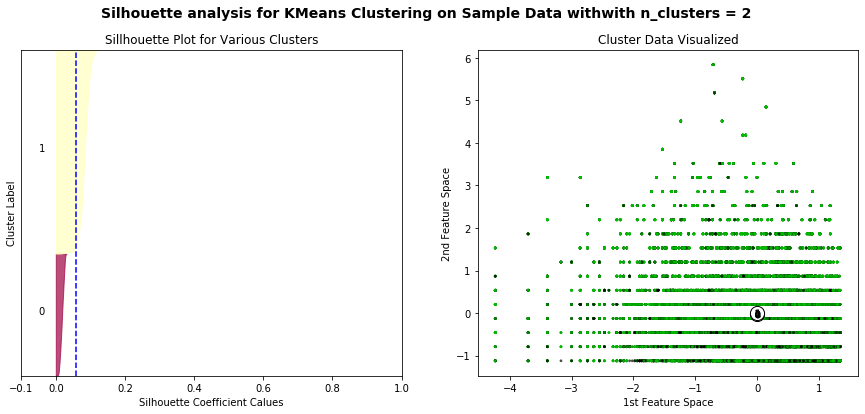

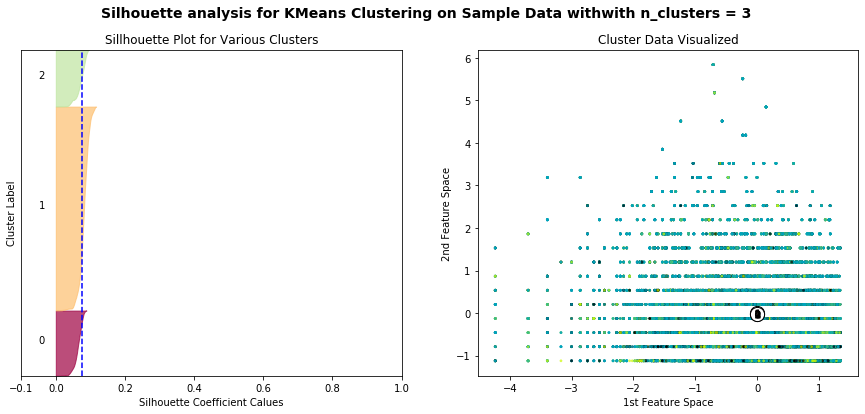

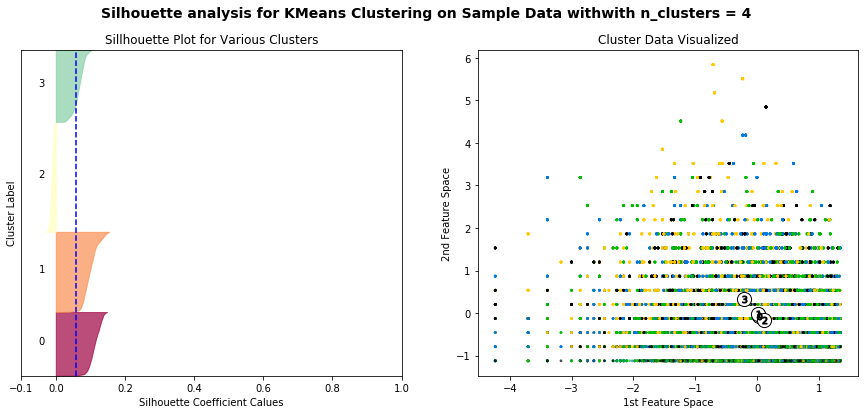

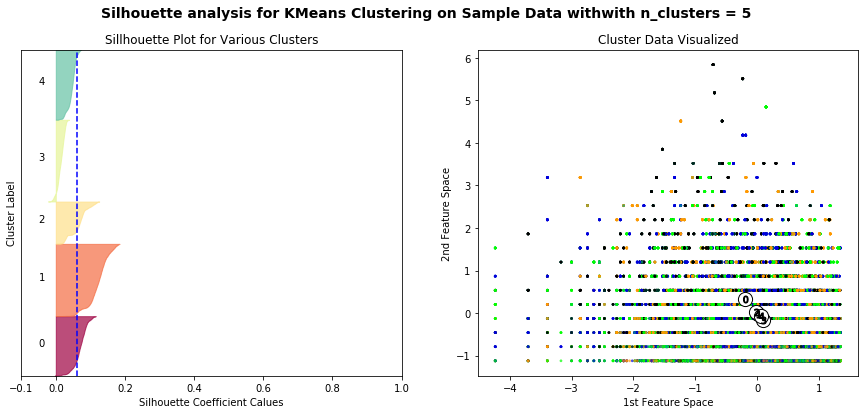

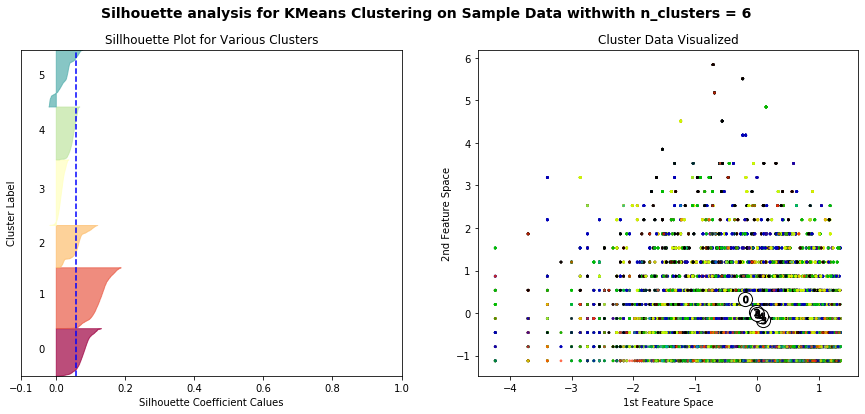

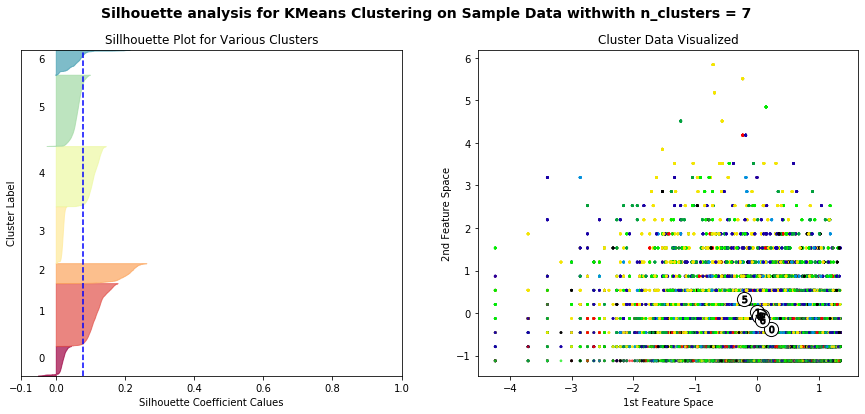

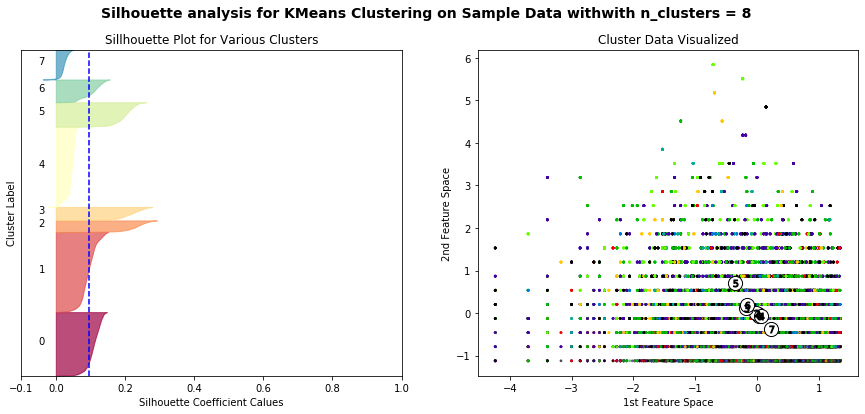

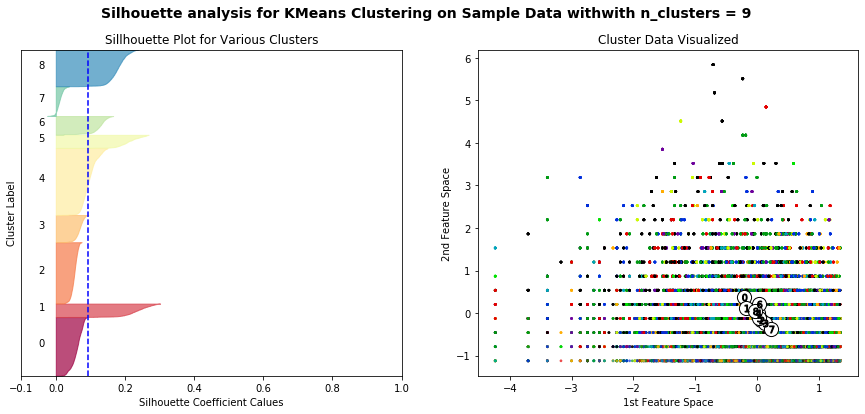

In [106]:
Krange = list(range(2, 11))
avg_silhouette_scores = []

for n_clusters in Krange: 
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 6)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    
    avg_silhouette = silhouette_score(X, cluster_labels)
    avg_silhouette_scores.append(avg_silhouette)
    print("For n_clusters =", n_clusters, "Average Silhouette Score is:", avg_silhouette)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    
    for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            
            ith_cluster_silhouette_values.sort()
            
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            cmap = cm.get_cmap("Spectral")
            color = cmap(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, 
                              ith_cluster_silhouette_values, facecolor=color, 
                              edgecolor = color, alpha=0.7) 
            
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            
            y_lower = y_upper + 10
            
    ax1.set_title("Sillhouette Plot for Various Clusters")
    ax1.set_xlabel("Silhouette Coefficient Calues")
    ax1.set_ylabel('Cluster Label')
        
    ax1.axvline(x=avg_silhouette, color='blue', linestyle='--')\
    
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker = '.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    ax2.set_title('Cluster Data Visualized')
    ax2.set_xlabel('1st Feature Space')
    ax2.set_ylabel('2nd Feature Space')
    
    plt.suptitle(("Silhouette analysis for KMeans Clustering on Sample Data with"  "with n_clusters = %d" % n_clusters), 
                 fontsize=14, fontweight='bold')
                 
plt.show()                               

Text(0, 0.5, 'Avg Silhouette Scores')

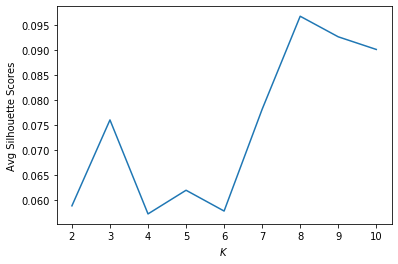

In [107]:
plt.plot(Krange, avg_silhouette_scores)
plt.xlabel("$K$")
plt.ylabel("Avg Silhouette Scores")

The silhouette method identifies that the optimal number of clusters is 6. Although 4 has the higest score, the thickness and distribution appears to be much better in 6 clusters. 

In [108]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(data_scaled)
cluster_labels = kmeans.labels_

In [109]:
data_labels = test_data.assign(Cluster=cluster_labels)
cluster_groups = data_labels.groupby(['Cluster'])

cluster_groups.agg({'Recency': 'mean', 
                    'Frequency': 'mean',
                    'Spending': ['mean','count']})

Recency Frequency     Spending      
             mean      mean         mean count
Cluster                                       
0        5.573566  4.160441  4784.538300  7442
1        5.539843  4.314609  6003.225570  9364
2        5.491155  4.364985  5324.282188  1348
3        5.280356  4.726289  5511.305767  1571
4        5.599177  4.152072  7051.595174  9364
5        5.058815  6.537548  7015.838117  2863
6        5.319606  4.980400  5410.885447  2653
7        5.825594  3.267780  2754.164120  3473

### Train-Test Split

In [110]:
X = data_scaled
y = data_labels['Cluster']

In [111]:
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

The data is split into 80-20. The predictive model is predict the classification of a customer. The y value is the cluster label obtained from the elbow and silhouette method. 

### Decision Tree

In [116]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print('Train Score:', dt.score(x_train, y_train))
print('Test Score:', dt.score(x_test, y_test))

Train Score: 1.0
Test Score: 1.0


In [117]:
y_pred_dt = dt.predict(x_test)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(conf_matrix_dt)

[[1529    0    0    0    0    0    0    0]
 [   0 1854    0    0    0    0    0    0]
 [   0    0  256    0    0    0    0    0]
 [   0    0    0  337    0    0    0    0]
 [   0    0    0    0 1884    0    0    0]
 [   0    0    0    0    0  550    0    0]
 [   0    0    0    0    0    0  518    0]
 [   0    0    0    0    0    0    0  688]]


In [118]:
cv_scores_train_dt = cross_val_score(dt, x_train, y_train, cv=3)
cv_scores_test_dt = cross_val_score(dt, x_test, y_test, cv=3)
print(cv_scores_test_dt)

avg_cv_scores_dt_train = cv_scores_train_dt.mean()
avg_cv_scores_dt_test = cv_scores_test_dt.mean()
cv_scores_std_dt = cv_scores_test_dt.std()
classification_report_dt = classification_report(y_test, y_pred_dt)

print('Avg cross validation train score: ', avg_cv_scores_dt_train)
print('Avg cross validation test score: ', avg_cv_scores_dt_test)
print('Standard deviation in cv scores: ', cv_scores_std_dt)
print('Classification Report:' '\n', classification_report_dt)

[1. 1. 1.]
Avg cross validation train score:  1.0
Avg cross validation test score:  1.0
Standard deviation in cv scores:  0.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1529
           1       1.00      1.00      1.00      1854
           2       1.00      1.00      1.00       256
           3       1.00      1.00      1.00       337
           4       1.00      1.00      1.00      1884
           5       1.00      1.00      1.00       550
           6       1.00      1.00      1.00       518
           7       1.00      1.00      1.00       688

    accuracy                           1.00      7616
   macro avg       1.00      1.00      1.00      7616
weighted avg       1.00      1.00      1.00      7616



In [130]:
dt = DecisionTreeClassifier()
paramters = {"max_features": [3, 4, 5], "max_depth":[2,4,6,8,10]}
dt_cv = GridSearchCV(dt, paramters, cv=5)
dt_cv.fit(x_train, y_train)
dt_cv.best_params_

{'max_depth': 10, 'max_features': 5}

In [141]:
import time
start = time.process_time()

dt = DecisionTreeClassifier(max_features=5, max_depth=10)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print("train score:", dt.score(x_train, y_train))
print("test score:", dt.score(x_test, y_test))
print("average validation score:", (cross_validate(dt, x_train, y_train, cv=5)["test_score"]).mean())
print(classification_report(y_test, y_pred_dt))
print((accuracy_score(y_test, y_pred_dt)*100))

print("--- %s seconds ---" % (time.process_time() - start))

train score: 0.8300505547895739
test score: 0.8323266806722689
average validation score: 0.852443263148491
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1529
           1       0.97      0.59      0.74      1854
           2       0.97      0.73      0.84       256
           3       0.63      0.36      0.45       337
           4       0.75      1.00      0.85      1884
           5       0.85      0.83      0.84       550
           6       0.61      0.86      0.71       518
           7       1.00      1.00      1.00       688

    accuracy                           0.83      7616
   macro avg       0.83      0.79      0.79      7616
weighted avg       0.86      0.83      0.82      7616

83.23266806722688
--- 0.203125 seconds ---


### Random Forest

In [119]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print('Train Score:', rf.score(x_train, y_train))
print('Test Score:', rf.score(x_test, y_test))

Train Score: 1.0
Test Score: 1.0


In [120]:
y_pred_rf = rf.predict(x_test)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

[[1529    0    0    0    0    0    0    0]
 [   0 1854    0    0    0    0    0    0]
 [   0    0  256    0    0    0    0    0]
 [   0    0    0  337    0    0    0    0]
 [   0    0    0    0 1884    0    0    0]
 [   0    0    0    0    0  550    0    0]
 [   0    0    0    0    0    0  518    0]
 [   0    0    0    0    0    0    0  688]]


In [121]:
cv_scores_train_rf = cross_val_score(rf, x_train, y_train, cv=3)
cv_scores_test_rf = cross_val_score(rf, x_test, y_test, cv=3)
print(cv_scores_test_rf)

avg_cv_scores_rf_train = cv_scores_train_rf.mean()
avg_cv_scores_rf_test = cv_scores_test_rf.mean()
cv_scores_std_rf = cv_scores_test_rf.std()
classification_report_rf = classification_report(y_test, y_pred_rf)

print('Avg cross validation train score: ', avg_cv_scores_rf_train)
print('Avg cross validation test score: ', avg_cv_scores_rf_test)
print('Standard deviation in cv scores: ', cv_scores_std_rf)
print('Classification Report:' '\n', classification_report_rf)

[1. 1. 1.]
Avg cross validation train score:  1.0
Avg cross validation test score:  1.0
Standard deviation in cv scores:  0.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1529
           1       1.00      1.00      1.00      1854
           2       1.00      1.00      1.00       256
           3       1.00      1.00      1.00       337
           4       1.00      1.00      1.00      1884
           5       1.00      1.00      1.00       550
           6       1.00      1.00      1.00       518
           7       1.00      1.00      1.00       688

    accuracy                           1.00      7616
   macro avg       1.00      1.00      1.00      7616
weighted avg       1.00      1.00      1.00      7616



In [129]:
rf = RandomForestClassifier()
paramters = {"n_estimators": [100, 200, 300], "max_depth":[2,4,6,8,10]}
rf_cv = GridSearchCV(rf, paramters, cv=5)
rf_cv.fit(x_train, y_train)
rf_cv.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [139]:
start = time.process_time()

rf = RandomForestClassifier(n_estimators=100, max_depth=4)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("train score:", rf.score(x_train, y_train))
print("test score:", rf.score(x_test, y_test))
print("average validation score:", (cross_validate(rf, x_train, y_train, cv=5)["test_score"]).mean())
print(classification_report(y_test, y_pred_rf))
print((accuracy_score(y_test, y_pred_rf)*100))

print("--- %s seconds ---" % (time.process_time() - start))

train score: 1.0
test score: 1.0
average validation score: 0.9985557196783195
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1529
           1       1.00      1.00      1.00      1854
           2       1.00      1.00      1.00       256
           3       1.00      1.00      1.00       337
           4       1.00      1.00      1.00      1884
           5       1.00      1.00      1.00       550
           6       1.00      1.00      1.00       518
           7       1.00      1.00      1.00       688

    accuracy                           1.00      7616
   macro avg       1.00      1.00      1.00      7616
weighted avg       1.00      1.00      1.00      7616

100.0
--- 5.28125 seconds ---


### Naive Bayes

In [122]:
nb = GaussianNB()
nb.fit(x_train, y_train)
print('Train Score:', nb.score(x_train, y_train))
print('Test Score:', nb.score(x_test, y_test))

Train Score: 1.0
Test Score: 1.0


In [123]:
y_pred_nb = nb.predict(x_test)

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(conf_matrix_nb)

[[1529    0    0    0    0    0    0    0]
 [   0 1854    0    0    0    0    0    0]
 [   0    0  256    0    0    0    0    0]
 [   0    0    0  337    0    0    0    0]
 [   0    0    0    0 1884    0    0    0]
 [   0    0    0    0    0  550    0    0]
 [   0    0    0    0    0    0  518    0]
 [   0    0    0    0    0    0    0  688]]


In [124]:
cv_scores_train_nb = cross_val_score(nb, x_train, y_train, cv=3)
cv_scores_test_nb = cross_val_score(nb, x_test, y_test, cv=3)
print(cv_scores_test_nb)

avg_cv_scores_nb_train = cv_scores_train_nb.mean()
avg_cv_scores_nb_test = cv_scores_test_nb.mean()
cv_scores_std_nb = cv_scores_test_nb.std()
classification_report_nb = classification_report(y_test, y_pred_nb)

print('Avg cross validation train score:', avg_cv_scores_nb_train)
print('Avg cross validation test score:', avg_cv_scores_nb_test)
print('Standard deviation in cv scores:', cv_scores_std_nb)
print('Classification Report:' '\n', classification_report_nb)

[1.         1.         0.99960599]
Avg cross validation train score: 0.9999671722145624
Avg cross validation test score: 0.9998686629892304
Standard deviation in cv scores: 0.000185738581871933
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1529
           1       1.00      1.00      1.00      1854
           2       1.00      1.00      1.00       256
           3       1.00      1.00      1.00       337
           4       1.00      1.00      1.00      1884
           5       1.00      1.00      1.00       550
           6       1.00      1.00      1.00       518
           7       1.00      1.00      1.00       688

    accuracy                           1.00      7616
   macro avg       1.00      1.00      1.00      7616
weighted avg       1.00      1.00      1.00      7616



### Gradient Boosting

In [125]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
print('Train Score:', gb.score(x_train, y_train))
print('Test Score:', gb.score(x_test, y_test))

Train Score: 1.0
Test Score: 1.0


In [126]:
y_pred_gb = gb.predict(x_test)

conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print(conf_matrix_gb)

[[1529    0    0    0    0    0    0    0]
 [   0 1854    0    0    0    0    0    0]
 [   0    0  256    0    0    0    0    0]
 [   0    0    0  337    0    0    0    0]
 [   0    0    0    0 1884    0    0    0]
 [   0    0    0    0    0  550    0    0]
 [   0    0    0    0    0    0  518    0]
 [   0    0    0    0    0    0    0  688]]


In [127]:
cv_scores_train_gb = cross_val_score(gb, x_train, y_train, cv=3)
cv_scores_test_gb = cross_val_score(gb, x_test, y_test, cv=3)
print(cv_scores_test_gb)

avg_cv_scores_gb_train = cv_scores_train_gb.mean()
avg_cv_scores_gb_test = cv_scores_test_gb.mean()
cv_scores_std_gb = cv_scores_test_gb.std()
classification_report_gb = classification_report(y_test, y_pred_gb)

print('Avg cross validation train score: ', avg_cv_scores_gb_train)
print('Avg cross validation test score: ', avg_cv_scores_gb_test)
print('Standard deviation in cv scores: ', cv_scores_std_gb)
print('Classification Report:' '\n', classification_report_gb)

[1. 1. 1.]
Avg cross validation train score:  1.0
Avg cross validation test score:  1.0
Standard deviation in cv scores:  0.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1529
           1       1.00      1.00      1.00      1854
           2       1.00      1.00      1.00       256
           3       1.00      1.00      1.00       337
           4       1.00      1.00      1.00      1884
           5       1.00      1.00      1.00       550
           6       1.00      1.00      1.00       518
           7       1.00      1.00      1.00       688

    accuracy                           1.00      7616
   macro avg       1.00      1.00      1.00      7616
weighted avg       1.00      1.00      1.00      7616



In [128]:
gb = GradientBoostingClassifier()
paramters = {"n_estimators": [100, 200, 300], "max_depth":[2,4,6,8,10]}
gb_cv = GridSearchCV(gb, paramters, cv=3)
gb_cv.fit(x_train, y_train)
gb_cv.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [140]:
start = time.process_time()

gb = GradientBoostingClassifier(n_estimators=100, max_depth=2)
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
print("train score:", gb.score(x_train, y_train))
print("test score:", gb.score(x_test, y_test))
print("average validation score:", (cross_validate(gb, x_train, y_train, cv=5)["test_score"]).mean())
print(classification_report(y_test, y_pred_gb))
print((accuracy_score(y_test, y_pred_gb)*100))

print("--- %s seconds ---" % (time.process_time() - start))

train score: 1.0
test score: 1.0
average validation score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1529
           1       1.00      1.00      1.00      1854
           2       1.00      1.00      1.00       256
           3       1.00      1.00      1.00       337
           4       1.00      1.00      1.00      1884
           5       1.00      1.00      1.00       550
           6       1.00      1.00      1.00       518
           7       1.00      1.00      1.00       688

    accuracy                           1.00      7616
   macro avg       1.00      1.00      1.00      7616
weighted avg       1.00      1.00      1.00      7616

100.0
--- 75.359375 seconds ---


## Conclusion

All the models had scored a high precision and recall score and in return had a high f1 score. Furthermore, Random Forest and Gradient Boosting had scored the highest with 100% accuracy score. The Random Forest Model will be used due to its effiecient computational power as it took 5 seconds compared to the Gradient Boosting taking 75 seconds. This model will be used to classify future customer segmentations based on their recency, frequency, and monetary classifications as well as ship mode, segment, region, market, category, sub-category, and rrder priority. This model will help the business identify and filter new or existing customers to focus on improving profit and target marketing. 

#### Future Improvements:

   - More features can be added with more computational power. This can increase specificty on customer behavioral actions. 
   - This can be presented to the marketing to set up a reward system using the customer score. As well as to show the customers what score they have been receiving and how to improve their score to receive higher rewards. 